Nome: Vinicius Anderson Silva da Silva<br>
Engenharia da Computação
    

# <center> **Estudo de Caso 1** </center>

<p> Um dos mais importantes processos metabólicos do organismo é a conversão de
alimentos em energia e calor, dentro do corpo. Os alimentos são constituídos de três
nutrientes principais: <p>
• Carboidratos - (digestão) Glicose<br>
• Proteínas - (digestão) Aminoácidos<br>
• Gorduras - (digestão) Ácidos Graxos<br>
<p>Quando o organismo falha no processo de execução deste processo metabólico, ele é
caracterizado como diabético. Diabete é uma anormalidade caracterizada por uma
quantidade de açúcar em excesso no sangue e na urina. A diabete mata e não tem cura
mais pode ser controlada, por isso é importante diagnosticá-la o quanto antes.<p>
<p>Projete e implemente em python, um algoritmo de classificação através de Máquinas de
vetores de Suporte, que classifique os pacientes como diabético ou não diabético, a
partir das 8 entradas listadas a seguir:<p>
1. Número de vezes que ficou grávida<br>
2. Concentração de glicose no Plasma em teste de tolerância de glicose oral<br>
3. Pressão sangüínea Diastólica (mm Hg)<br>
4. Dobras na pele do tríceps (mm)<br>
5. 2-Horas de insulina de soro (mu U/ml)<br>
6. Índice de massa corpórea (peso em kg/(altura em m 2 )<br>
7. Função de genealogia de diabete<br>
8. Idade (anos)<br><br>
(*) massa de dados: diabetes_test

# FASE 01- EXPLORAÇÃO DA BASE DE DADOS

In [212]:

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
diabetes = pd.read_csv('teste_diabetes3.csv',encoding= "UTF-8", sep = ",")
diabetes.columns 
#diabetes.dtypes
#diabetes['IMC']= diabetes.IMC.astype(float)


Index(['GRAVIDEZ', 'GLICOSE', 'PRESSAO', 'DOBRAS', 'INSULINA', 'IMC',
       'GENEALOGIA', 'IDADE', 'SAIDA'],
      dtype='object')

In [213]:
diabetes.head()


,GRAVIDEZ,GLICOSE,PRESSAO,DOBRAS,INSULINA,IMC,GENEALOGIA,IDADE,SAIDA
0,6,148,72,35,0,33.6,0.6,50,2
1,1,85,66,29,0,26.6,0.4,31,1
2,8,183,64,0,0,23.3,0.7,32,2
3,1,89,66,23,94,28.1,0.2,21,1
4,0,137,40,35,168,43.1,2.3,33,2


In [214]:
print("Diabetes data set dimensions : {}".format(diabetes.shape))

Diabetes data set dimensions : (768, 9)


In [215]:

diabetes.groupby('SAIDA').size()

SAIDA
1    500
2    268
dtype: int64

SAIDA
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
2    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

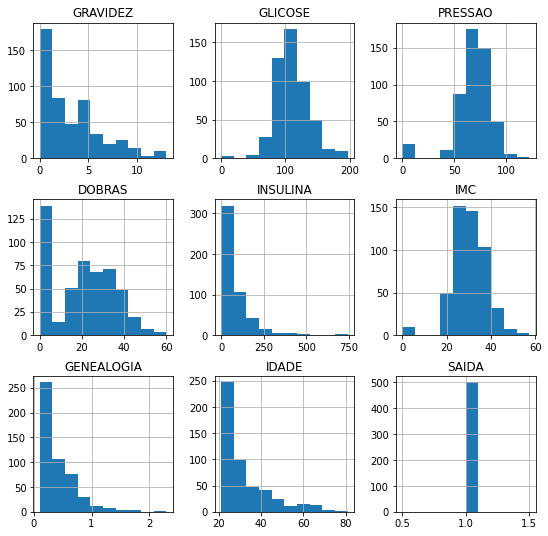

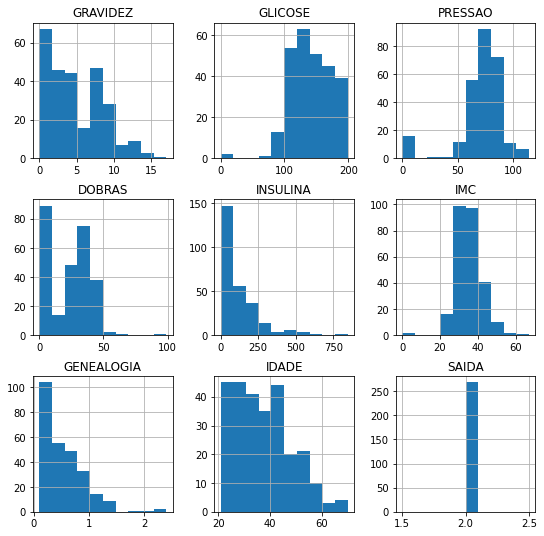

In [216]:
diabetes.groupby('SAIDA').hist(figsize=(9, 9))

# FASE 02- LIMPAR BASE DE DADOS

In [217]:
diabetes.isnull().sum()
diabetes.isna().sum()

GRAVIDEZ      0
GLICOSE       0
PRESSAO       0
DOBRAS        0
INSULINA      0
IMC           0
GENEALOGIA    0
IDADE         0
SAIDA         0
dtype: int64

In [218]:
#Pontos fora da curva
       #Pressão Sanguinea
print("Total : ", diabetes[diabetes.PRESSAO == 0].shape[0])
print(diabetes[diabetes.PRESSAO == 0].groupby('SAIDA')['IDADE'].count())

Total :  35
SAIDA
1    19
2    16
Name: IDADE, dtype: int64


In [219]:
#Glicose
print("Total : ", diabetes[diabetes.GLICOSE == 0].shape[0])
print(diabetes[diabetes.GLICOSE == 0].groupby('SAIDA')['IDADE'].count())

Total :  5
SAIDA
1    3
2    2
Name: IDADE, dtype: int64


In [220]:
#Dobras
print("Total : ", diabetes[diabetes.DOBRAS == 0].shape[0])
print(diabetes[diabetes.DOBRAS == 0].groupby('SAIDA')['IDADE'].count())

Total :  227
SAIDA
1    139
2     88
Name: IDADE, dtype: int64


In [221]:
#IMC
print("Total : ", diabetes[diabetes.IMC == 0].shape[0])
print(diabetes[diabetes.IMC == 0].groupby('SAIDA')['IDADE'].count())

Total :  11
SAIDA
1    9
2    2
Name: IDADE, dtype: int64


In [222]:
#Insulina
print("Total : ", diabetes[diabetes.INSULINA == 0].shape[0])
print(diabetes[diabetes.INSULINA == 0].groupby('SAIDA')['IDADE'].count())

Total :  374
SAIDA
1    236
2    138
Name: IDADE, dtype: int64


In [223]:
#Removendo Pressão, IMC e Glisoce iguais a 0(zero)
diabetes_mod = diabetes[(diabetes.PRESSAO != 0) & (diabetes.IMC != 0) & (diabetes.GLICOSE != 0)]
print(diabetes_mod.shape)


(724, 9)


# FASE 03- PRÉ PROCESSAMENTO


In [224]:
# Separação em conjuntos de treino e teste
array = diabetes.values
X = array[:, 0:8].astype(float)
Y = array[:, 8]
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [225]:
# Parâmetros
num_folds = 10
scoring = 'accuracy'

In [226]:
#Modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [227]:
#Modelos
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))

In [228]:
np.random.seed(7) # definindo uma semente global
# Avaliação dos modelos
results = []
names = []
for name, model in models:
              
        kfold = KFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring).mean()
        
        
        results.append(cv_results)
        names.append(name)


kf_cross_val = pd.DataFrame({'Nome': names, 'Resultados': results})
print(kf_cross_val)

c:\users\vinicius silva\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\users\vinicius silva\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

  Nome  Resultados
0  KNN    0.710153
1  SVC    0.757271
2   LR    0.771867
3   DT    0.689080
4  GNB    0.750793
5   RF    0.750793
6   GB    0.737626


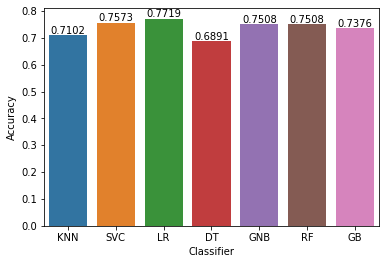

In [229]:
# Comparação dos modelos
axis = sns.barplot(x = 'Nome', y = 'Resultados', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')
for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
plt.show()

In [230]:
np.random.seed(7) # definindo uma semente global
# Preparação do modelo
model = LogisticRegression(solver='newton-cg')
model.fit(X_train, Y_train)
# Estimativa da acurácia no conjunto de teste
predictions = model.predict(X_test)
print("Accuracy score = ", accuracy_score(Y_test, predictions))

Accuracy score =  0.7987012987012987


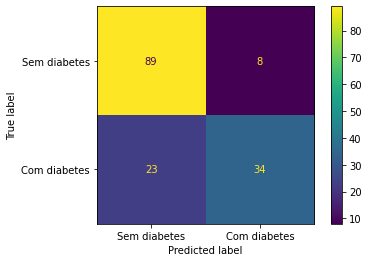

              precision    recall  f1-score   support

Sem diabetes       0.79      0.92      0.85        97
Com diabetes       0.81      0.60      0.69        57

    accuracy                           0.80       154
   macro avg       0.80      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [231]:
# Matriz de confusão
cm = confusion_matrix(Y_test, predictions)
labels = ["Sem diabetes","Com diabetes"]
cmd = ConfusionMatrixDisplay(cm, display_labels=labels)
cmd.plot(values_format="d")
plt.show()
print(classification_report(Y_test, predictions, target_names=labels))

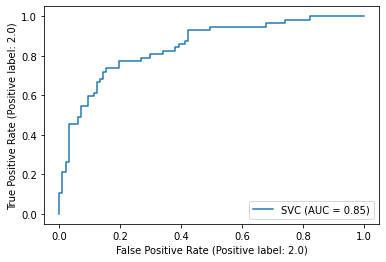

In [237]:
from sklearn import datasets, metrics, model_selection, svm
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
clf = svm.SVC(random_state=seed)
clf.fit(X_train, Y_train)
SVC(random_state=seed)
metrics.plot_roc_curve(clf, X_test, Y_test)  
plt.show() 

# <center> **REFERÊNCIAS** </center>
-->https://towardsdatascience.com/machine-learning-workflow-on-diabetes-data-part-01-573864fcc6b8 <p>
-->https://tatianaesc.medium.com/implementando-um-modelo-de-classifica%C3%A7%C3%A3o-no-scikit-learn-6206d684b377 <p>
-->https://www.kaggle.com/anushaharikumar/diabetes-prediction-using-k-nearest-neighbors <p>
-->https://www.kaggle.com/sudarvizhia/prediction-of-diabetes-classification-model <p>
-->https://www.section.io/engineering-education/diagnose-diabetes-with-svm/ <p>
-->https://blogdozouza.wordpress.com/2019/04/10/algoritmo-svm-maquina-de-vetores-de-suporte-a-partir-de-exemplos-e-codigo-python-e-r/ <p>
-->https://en.wikipedia.org/wiki/Cross-validation_(statistics) <p>
-->https://pt.wikipedia.org/wiki/M%C3%A1quina_de_vetores_de_suporte <p>